In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
file_path = "Cell-Cycle-Set.xlsx"
df = pd.read_excel(file_path)

df = df.dropna()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 1 to 498
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gene_Name        397 non-null    object 
 1   mean_RNA_G1      397 non-null    float64
 2   mean_RNA_S       397 non-null    float64
 3   mean_RNA_G2      397 non-null    float64
 4   mean_protein_G1  397 non-null    float64
 5   mean_protein_S   397 non-null    float64
 6   mean_protein_G2  397 non-null    float64
 7   GOBP             397 non-null    object 
 8   GOMF             397 non-null    object 
 9   GOCC             397 non-null    object 
dtypes: float64(6), object(4)
memory usage: 34.1+ KB
None


Variance of RNA concentrations:
mean_RNA_G1    2.160506
mean_RNA_S     2.145592
mean_RNA_G2    2.101649
dtype: float64

Variance of Protein concentrations:
mean_protein_G1    10.453574
mean_protein_S     10.403018
mean_protein_G2    10.018217
dtype: float64

Mean of RNA concentrations:
mean_RNA_G1    11.215627
mean_RNA_S     11.186962
mean_RNA_G2    11.257939
dtype: float64

Mean of Protein concentrations:
mean_protein_G1    25.351672
mean_protein_S     22.847658
mean_protein_G2    25.573553
dtype: float64


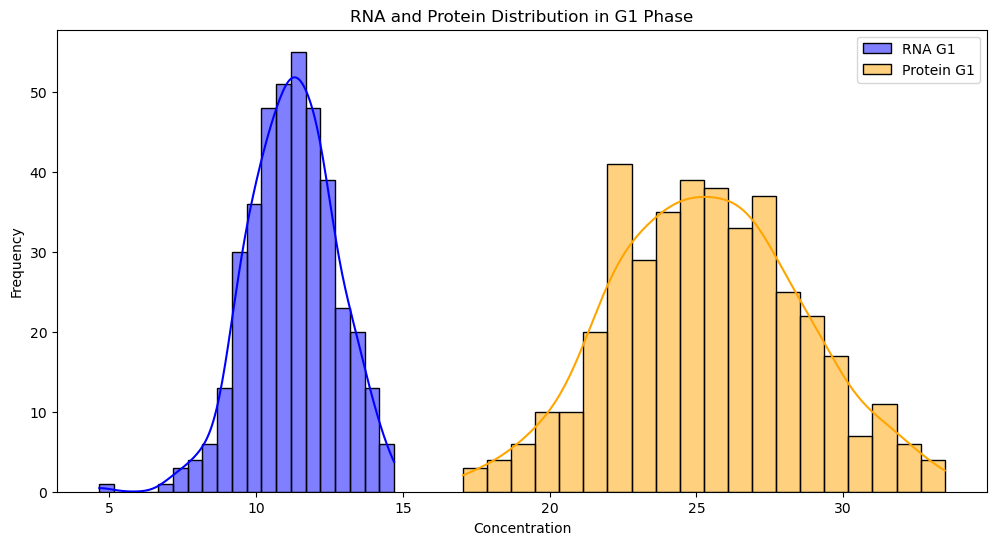

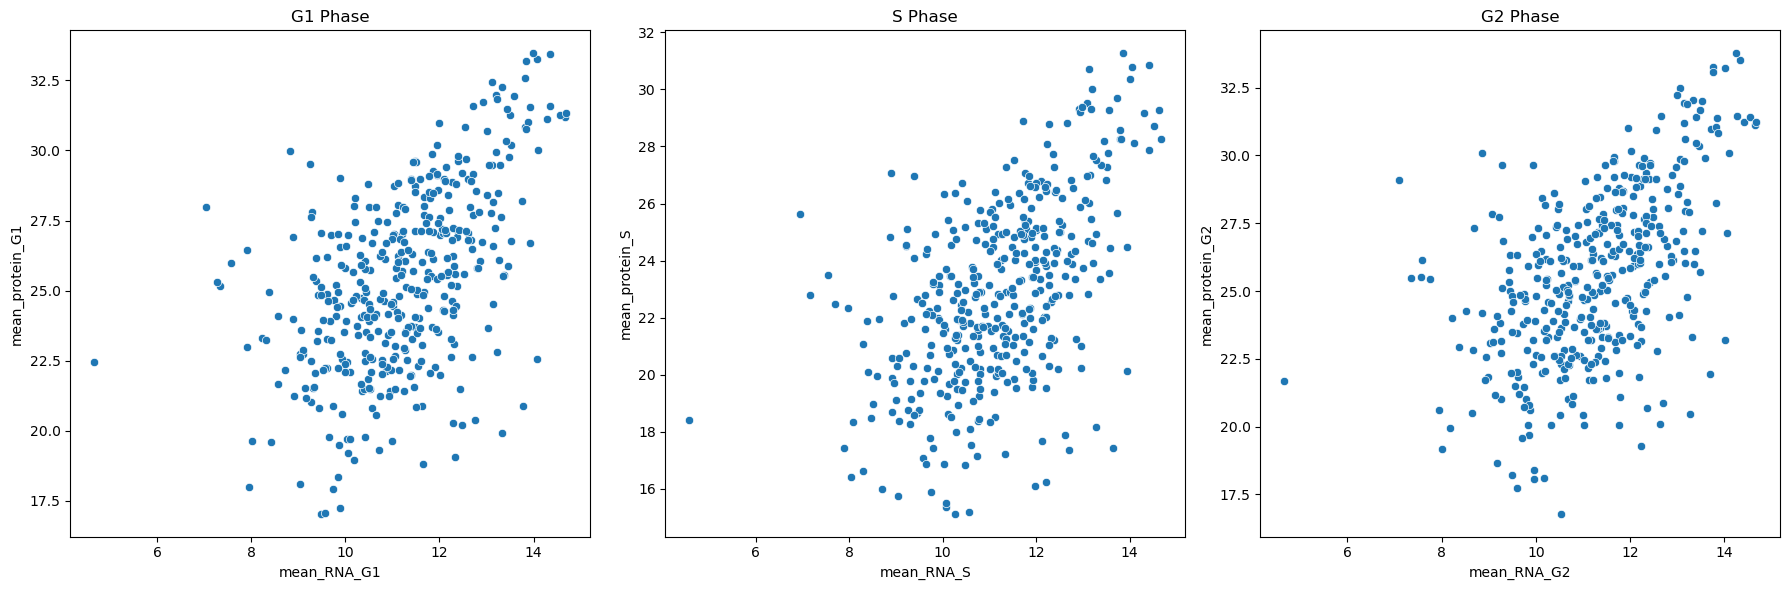

In [21]:
# Calculate variance and mean of RNA and protein concentrations
variance_rna = df[['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2']].var()
variance_protein = df[['mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']].var()

mean_rna = df[['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2']].mean()
mean_protein = df[['mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']].mean()

print("Variance of RNA concentrations:")
print(variance_rna)
print("\nVariance of Protein concentrations:")
print(variance_protein)

print("\nMean of RNA concentrations:")
print(mean_rna)
print("\nMean of Protein concentrations:")
print(mean_protein)

# Generate a histogram of RNA and protein distribution for one cell cycle stage
plt.figure(figsize=(12, 6))
sns.histplot(df['mean_RNA_G1'], bins=20, kde=True, label='RNA G1', color='blue')
sns.histplot(df['mean_protein_G1'], bins=20, kde=True, label='Protein G1', color='orange')
plt.title('RNA and Protein Distribution in G1 Phase')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Generate scatterplot of RNA vs Protein concentrations for each stage
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='mean_RNA_G1', y='mean_protein_G1', data=df)
plt.title('G1 Phase')

plt.subplot(1, 3, 2)
sns.scatterplot(x='mean_RNA_S', y='mean_protein_S', data=df)
plt.title('S Phase')

plt.subplot(1, 3, 3)
sns.scatterplot(x='mean_RNA_G2', y='mean_protein_G2', data=df)
plt.title('G2 Phase')

plt.tight_layout()
plt.show()


Mean Squared Error: 7.26077474358326


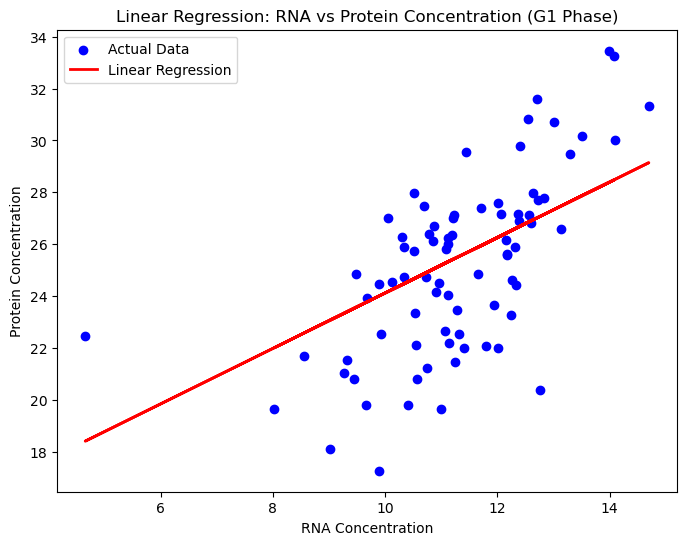

In [26]:
# Choose a cell cycle stage (e.g., G1) for linear regression
stage = 'G1'

# Select the features (RNA concentration) and target (Protein concentration) for the chosen stage
X = df[f'mean_RNA_{stage}'].values.reshape(-1, 1)
y = df[f'mean_protein_{stage}']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

# Visualize the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.title(f'Linear Regression: RNA vs Protein Concentration ({stage} Phase)')
plt.xlabel('RNA Concentration')
plt.ylabel('Protein Concentration')
plt.legend()
plt.show()